# Dataset Insights - Question Distribution Analysis

This notebook provides detailed insights into the dataset and the queries within all the databases.

### Import necessary libraries

In [12]:
import os

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv
from sentence_transformers import SentenceTransformer
import umap

import helpers.question_retriever as qr

In [13]:
root_folder_path = "../../dataset"
questions_df = qr.get_all_questions(root_folder_path)

### Basic Statistics

In [14]:
total_databases = questions_df['database'].nunique()
total_questions = questions_df['question'].nunique()

print(f"Total number of databases: {total_databases}")
print(f"Total number of questions: {total_questions}")

Total number of databases: 157
Total number of questions: 7724


### Unique Question Count from Databases

In [13]:
unique_question_counts_dict = qr.count_unique_questions(root_folder_path)
sorted_unique_counts_dict = dict(sorted(unique_question_counts_dict.items(), key=lambda item: item[1], reverse=True))

print(sorted_unique_counts_dict)

{'college_2': 169, 'college_1': 164, 'hr_1': 121, 'world_1': 120, 'store_1': 112, 'soccer_2': 106, 'bike_1': 104, 'hospital_1': 100, 'music_1': 100, 'allergy_1': 98, 'dorm_1': 98, 'movie_1': 97, 'flight_1': 96, 'driving_school': 93, 'car_1': 92, 'cre_Doc_Tracking_DB': 90, 'department_store': 88, 'customers_and_addresses': 88, 'activity_1': 88, 'products_gen_characteristics': 86, 'game_1': 86, 'network_2': 85, 'cre_Theme_park': 84, 'cre_Doc_Template_Mgt': 84, 'cre_Docs_and_Epenses': 84, 'chinook_1': 84, 'customers_and_invoices': 82, 'dog_kennels': 82, 'wine_1': 82, 'e_learning': 82, 'flight_4': 82, 'baseball_1': 82, 'cre_Drama_Workshop_Groups': 82, 'manufactory_1': 80, 'loan_1': 80, 'customers_card_transactions': 80, 'flight_2': 80, 'apartment_rentals': 80, 'student_transcripts_tracking': 78, 'tracking_grants_for_research': 77, 'college_3': 74, 'inn_1': 74, 'voter_2': 72, 'club_1': 70, 'csu_1': 69, 'election': 68, 'student_1': 68, 'icfp_1': 66, 'tvshow': 62, 'wta_1': 62, 'music_4': 60, 

In [15]:
df = pd.DataFrame(list(sorted_unique_counts_dict.items()), columns=['Database', 'Unique Question Count'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Database,Unique Question Count
0,college_2,169
1,college_1,164
2,hr_1,121
3,world_1,120
4,store_1,112
5,soccer_2,106
6,bike_1,104
7,hospital_1,100
8,music_1,100
9,allergy_1,98


### Summary Statistics

In [20]:
summary_stats = df.describe(include='all')
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
         Database  Unique Question Count
count         157             157.000000
unique        157                    NaN
top     college_2                    NaN
freq            1                    NaN
mean          NaN              49.420382
std           NaN              31.330768
min           NaN               4.000000
25%           NaN              21.000000
50%           NaN              40.000000
75%           NaN              77.000000
max           NaN             169.000000


In [21]:
variance = df['Unique Question Count'].var()
skewness = df['Unique Question Count'].skew()
kurtosis = df['Unique Question Count'].kurt()

print("\nVariance:")
print(variance)

print("\nSkewness:")
print(skewness)

print("\nKurtosis:")
print(kurtosis)



Variance:
981.6170178017312

Skewness:
1.002441152607653

Kurtosis:
1.045846464788791


### Visualizations

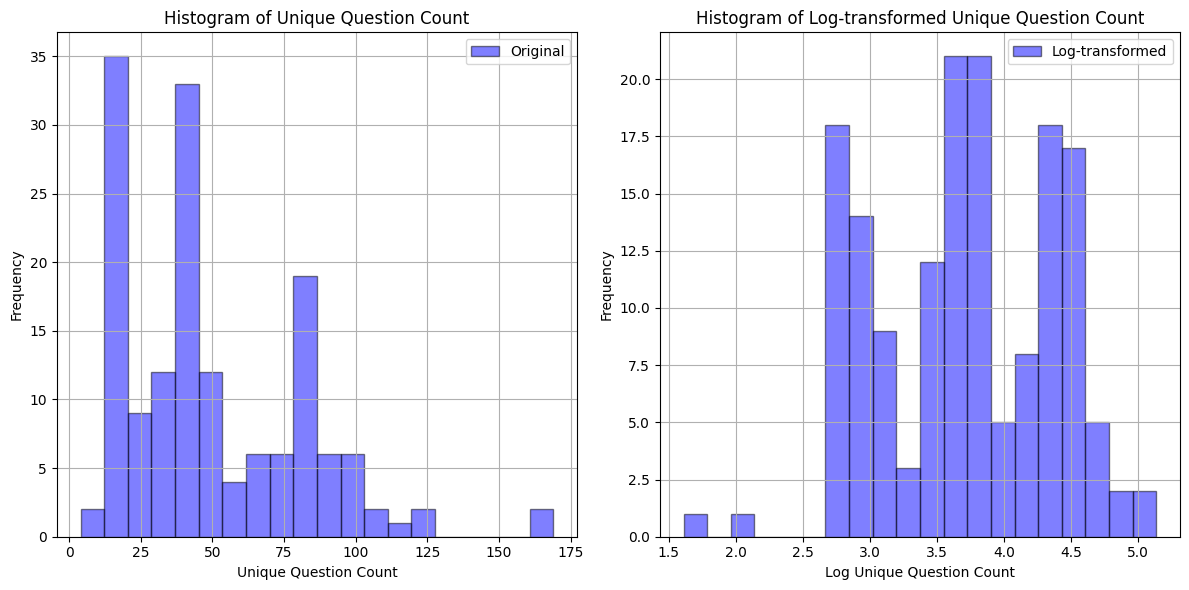

In [19]:
plt.figure(figsize=(12, 6))

# Data histogram
plt.subplot(1, 2, 1)
df['Unique Question Count'].hist(bins=20, alpha=0.5, label='Original', color='blue', edgecolor='black')
plt.title('Histogram of Unique Question Count')
plt.xlabel('Unique Question Count')
plt.ylabel('Frequency')
plt.legend()

# Log transformation to reduce skewness
df['Log Unique Question Count'] = np.log(df['Unique Question Count'] + 1)

# Log-transformed data histogram
plt.subplot(1, 2, 2)
df['Log Unique Question Count'].hist(bins=20, alpha=0.5, label='Log-transformed', color='blue', edgecolor='black')
plt.title('Histogram of Log-transformed Unique Question Count')
plt.xlabel('Log Unique Question Count')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


### Interpretations

**1. Variance**

981.62: This is a measure of how much the unique question counts vary from the mean. The high variance indicates that the data points are spread out over a wider range of values.

**2. Skewness**

1.002: This positive skewness value indicates that the distribution of unique question counts is right-skewed. This means that there are a few databases with a very high number of unique questions, pulling the tail of the distribution to the right.

**3. Kurtosis**

1.046: This positive kurtosis value suggests that the distribution has heavier tails and a sharper peak compared to a normal distribution. This means there are more extreme values (both low and high) in the unique question counts.


### Average Question Length

In [20]:
questions_df['question_length'] = questions_df['question'].apply(len)
mean_length = questions_df['question_length'].mean()
min_length = questions_df['question_length'].min()
max_length = questions_df['question_length'].max()

print(f"Mean question length: {mean_length}")
print(f"Min question length: {min_length}")
print(f"Max question length: {max_length}")


Mean question length: 70.47196803711819
Min question length: 16
Max question length: 224


In [21]:
distribution_df = questions_df.groupby('database')['question_length'].describe()
len_distribution_df = distribution_df[['mean', 'min', 'max']]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(len_distribution_df)

,mean,min,max
database,,,
activity_1,69.806818,27.0,172.0
aircraft,75.978261,29.0,137.0
allergy_1,52.551020,16.0,124.0
apartment_rentals,81.487500,40.0,139.0
architecture,76.941176,31.0,115.0
assets_maintenance,87.129032,34.0,158.0
baseball_1,76.304878,31.0,181.0
battle_death,74.062500,41.0,115.0
behavior_monitoring,71.775000,31.0,103.0


### Visualization

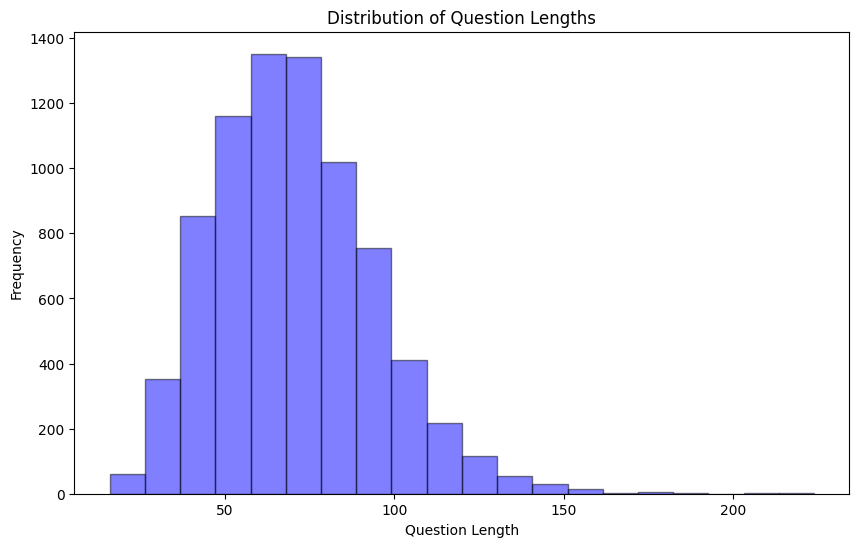

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(questions_df['question_length'], bins=20, alpha=0.5, color='blue', edgecolor='black')

plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')
plt.show()

### Interpretation

### Semantic Relationship

In [3]:
model = SentenceTransformer('all-mpnet-base-v2')
total_databases = len(questions_df['database'].unique())
embeddings = model.encode(questions_df['question'].tolist())

reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(embeddings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


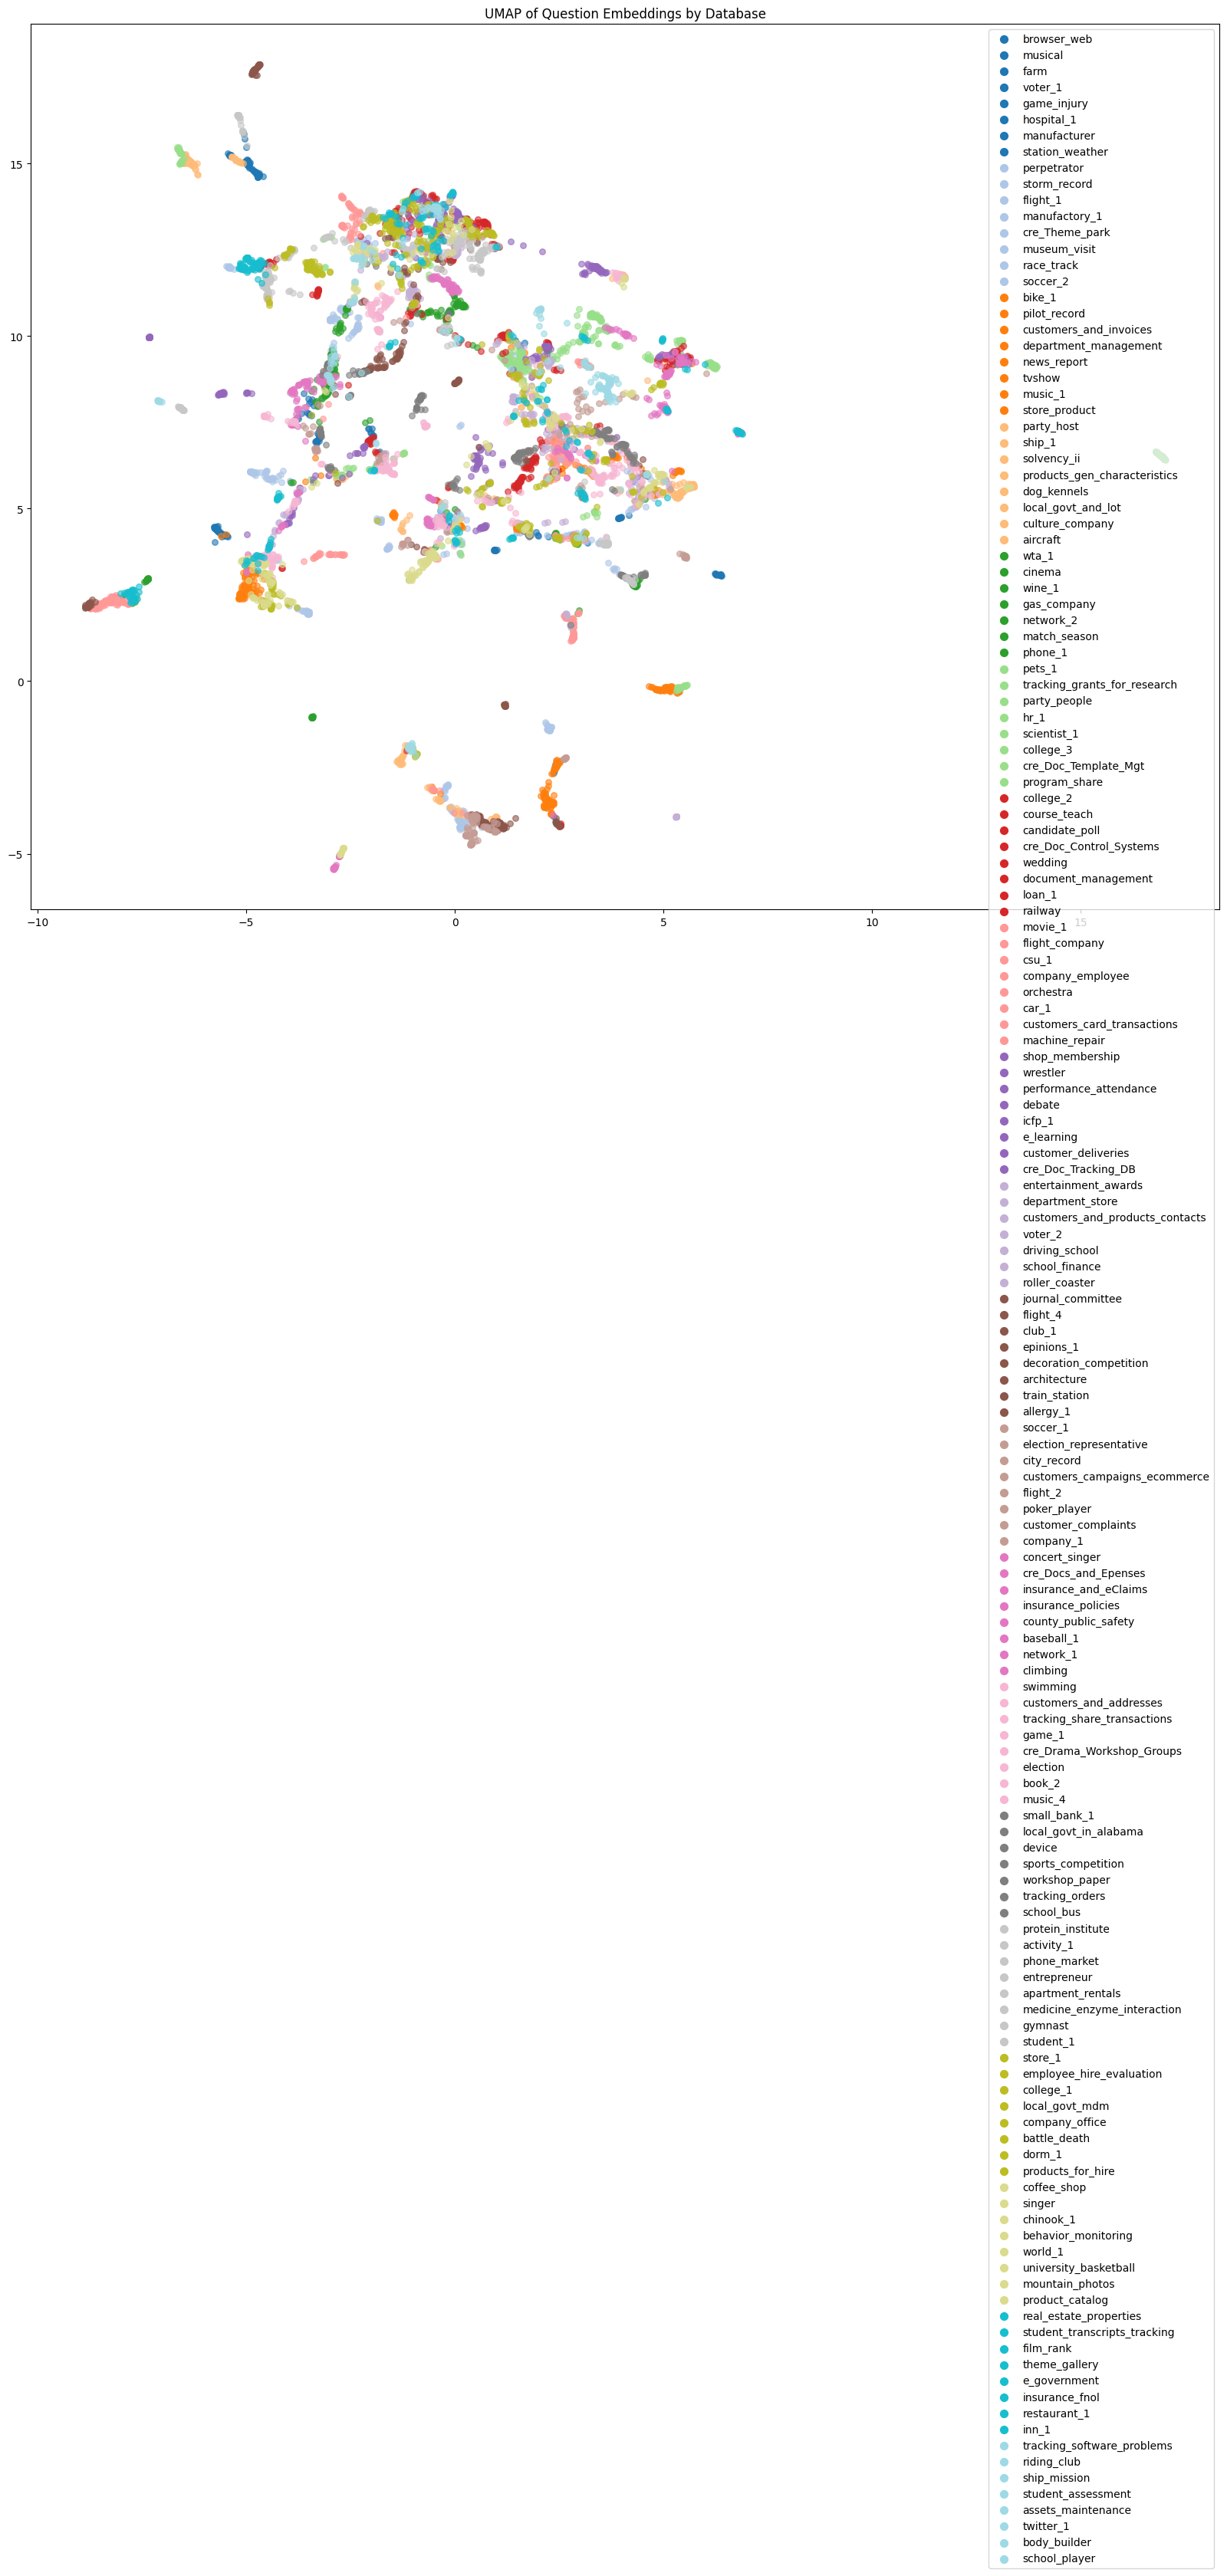

In [9]:
questions_df['x'] = embedding_umap[:, 0]
questions_df['y'] = embedding_umap[:, 1]

cmap = plt.get_cmap('tab20', total_databases)
colors = [cmap(i) for i in range(total_databases)]

plt.figure(figsize=(20, 15))
for i, database in enumerate(questions_df['database'].unique()):
    subset = questions_df[questions_df['database'] == database]
    
    # Plot the actual points with alpha=0.3 without label
    plt.scatter(subset['x'], subset['y'], alpha=0.6, s=30, color=colors[i])

# Plot invisible points for the legend with full opacity and label
for i, database in enumerate(questions_df['database'].unique()):
    plt.scatter([], [], label=database, s=50, color=colors[i])

plt.legend()
plt.title('UMAP of Question Embeddings by Database')
plt.show()